In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from wordcloud import WordCloud
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/NBA%202k20%20player%20dataset/nba2k-full.csv")
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    439 non-null    object
 1   rating       439 non-null    int64 
 2   jersey       439 non-null    object
 3   team         416 non-null    object
 4   position     439 non-null    object
 5   b_day        439 non-null    object
 6   height       439 non-null    object
 7   weight       439 non-null    object
 8   salary       439 non-null    object
 9   country      439 non-null    object
 10  draft_year   439 non-null    int64 
 11  draft_round  439 non-null    object
 12  draft_peak   439 non-null    object
 13  college      370 non-null    object
 14  version      439 non-null    object
dtypes: int64(2), object(13)
memory usage: 51.6+ KB


In [5]:
def impute_salary(cols):
    salary = cols[0]
    salary = salary.split('$')[1]
    salary = int(salary)

    return salary

def impute_height(cols):
    height = cols[0]
    height = height.split(' / ')[1]
    height = float(height)

    return height

def impute_weight(cols):
    weight = cols[0]
    weight = weight.split(' / ')[1].split(' kg.')[0]
    weight = float(weight)

    return weight

def impute_age(cols):
    year = cols[0]
    year = year.split('/')[2]
    year = int(year)
    if year > 50:
        year += 1900
    else:
        year += 2000
    
    age = 2020 - year
    

    return age
df['salary_int'] = df[['salary']].apply(impute_salary, axis='columns')
df['weight_int'] = df[['weight']].apply(impute_weight, axis='columns')
df['height_int'] = df[['height']].apply(impute_height, axis='columns')
df['age'] = df[['b_day']].apply(impute_age, axis='columns')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,salary_int,weight_int,height_int,age
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20,37436858,113.4,2.06,36
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20,32742000,102.1,2.01,29
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20,25842697,109.8,2.11,26
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20,37199000,104.3,2.08,32
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20,38199000,99.8,1.96,31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   full_name    439 non-null    object 
 1   rating       439 non-null    int64  
 2   jersey       439 non-null    object 
 3   team         416 non-null    object 
 4   position     439 non-null    object 
 5   b_day        439 non-null    object 
 6   height       439 non-null    object 
 7   weight       439 non-null    object 
 8   salary       439 non-null    object 
 9   country      439 non-null    object 
 10  draft_year   439 non-null    int64  
 11  draft_round  439 non-null    object 
 12  draft_peak   439 non-null    object 
 13  college      370 non-null    object 
 14  version      439 non-null    object 
 15  salary_int   439 non-null    int64  
 16  weight_int   439 non-null    float64
 17  height_int   439 non-null    float64
 18  age          439 non-null    int64  
dtypes: float

<AxesSubplot:title={'center':'Age Player Distribution'}, xlabel='age', ylabel='Count'>

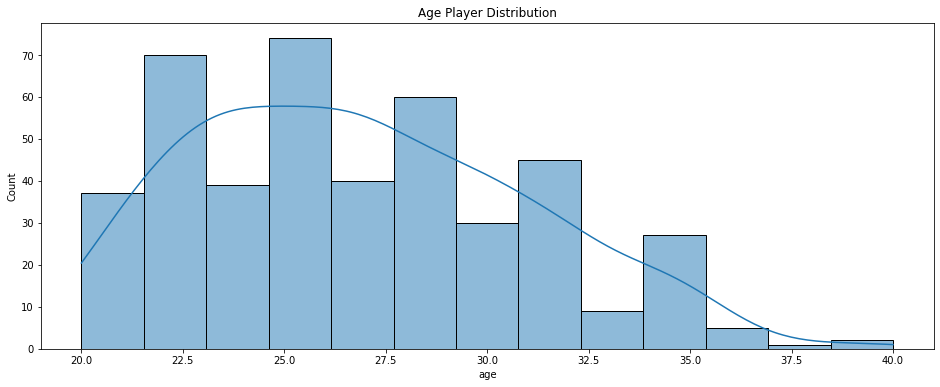

In [7]:
plt.figure(figsize=(16,6))
plt.title('Age Player Distribution')
sns.histplot(df['age'] , kde=True)

<AxesSubplot:xlabel='age', ylabel='full_name'>

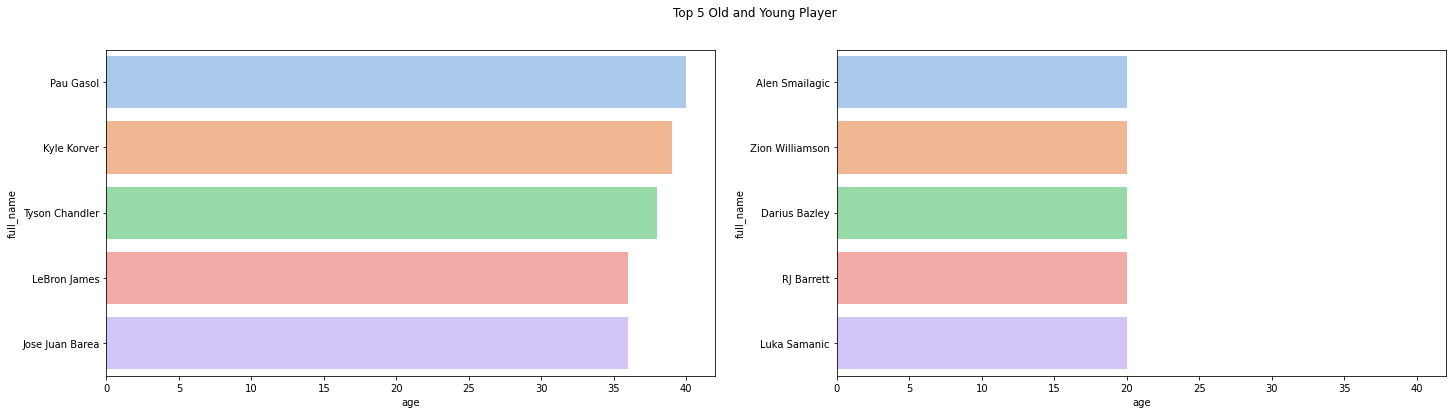

In [8]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(24,6))
figure.suptitle('Top 5 Old and Young Player')
sns.barplot(y='full_name', x="age", data=df.sort_values('age',ascending = False)[:5], palette='pastel', ax=axes[0])
sns.barplot(y="full_name", x="age", data=df.sort_values('age')[:5], palette='pastel', ax=axes[1])

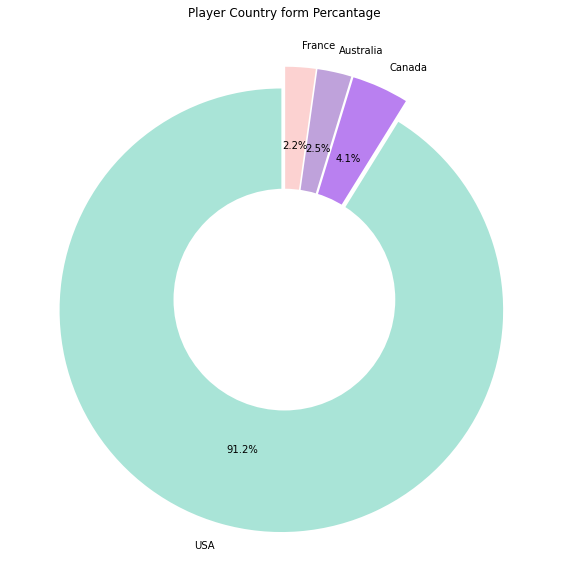

In [9]:
colors = ['#A9E4D7','#B980F0','#BFA2DB','#FCD2D1']
explode = (0.05,0.05,0.05,0.05)
country_count = df['country'].value_counts()

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.pie(country_count[:4], colors = colors, autopct='%1.1f%%', labels=country_count[:4].index, startangle=90, pctdistance=0.65, explode = explode)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.title("Player Country form Percantage")
plt.show()

<AxesSubplot:title={'center':'Rating Player Distribution'}, xlabel='rating', ylabel='Count'>

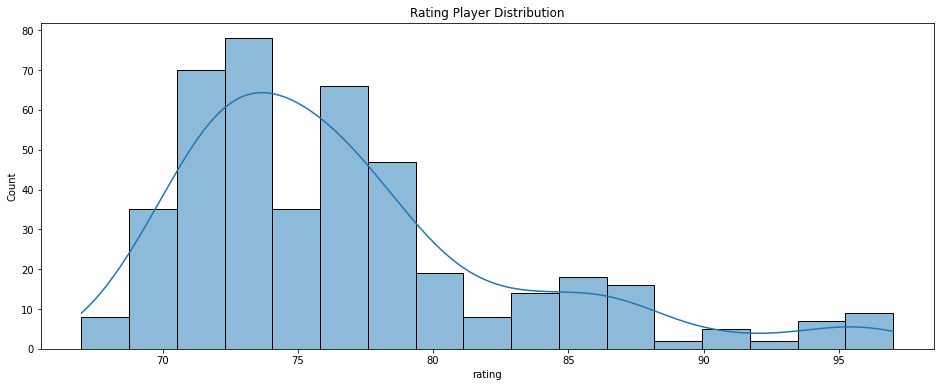

In [10]:
plt.figure(figsize=(16,6))
plt.title('Rating Player Distribution')
sns.histplot(df['rating'] , kde=True)

<AxesSubplot:title={'center':'Salary Player Distribution'}, xlabel='salary_int', ylabel='Count'>

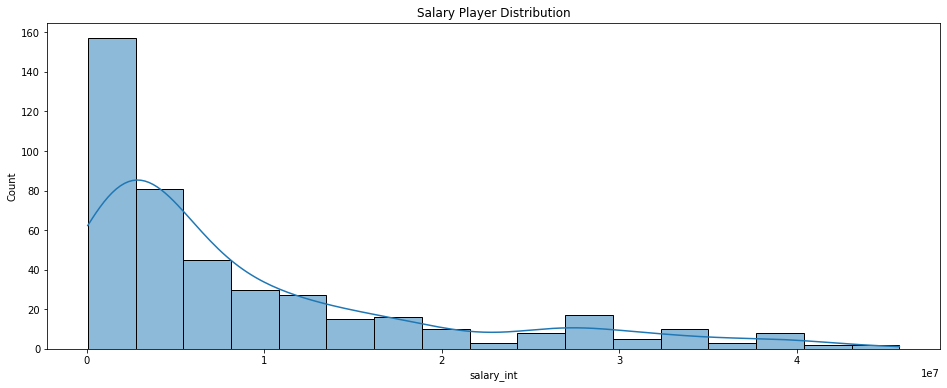

In [11]:
plt.figure(figsize=(16,6))
plt.title('Salary Player Distribution')
sns.histplot(df['salary_int'] , kde=True)

<AxesSubplot:title={'center':'Top 10 Player Rating'}, xlabel='rating', ylabel='full_name'>

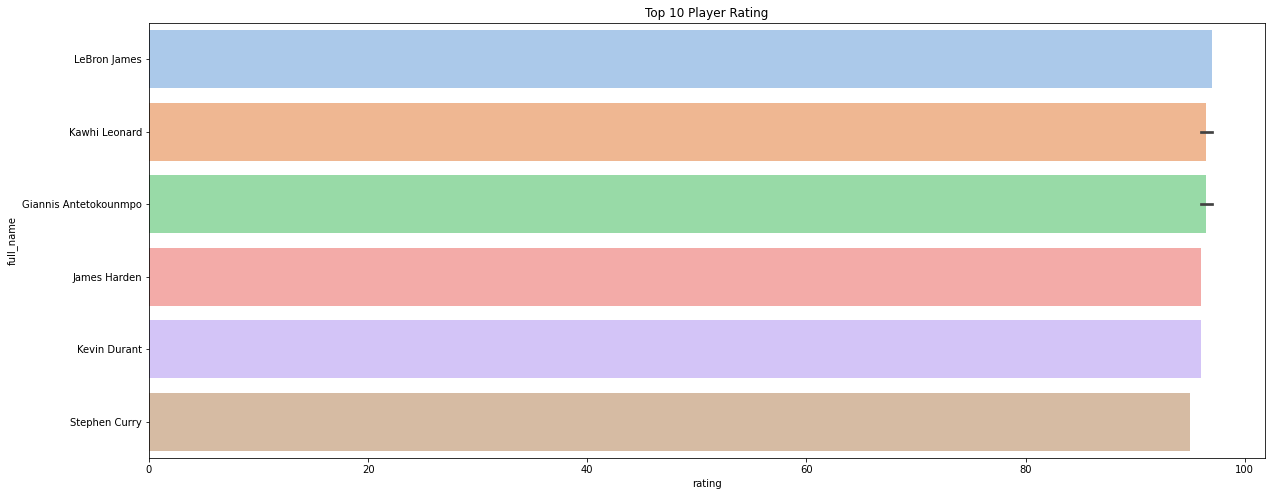

In [12]:
plt.figure(figsize=(20,8))
plt.title('Top 10 Player Rating')
sns.barplot(x='rating', y='full_name', data=df.sort_values('rating',ascending = False)[:10], palette='pastel')

<AxesSubplot:title={'center':'Top 10 Player Salary'}, xlabel='salary_int', ylabel='full_name'>

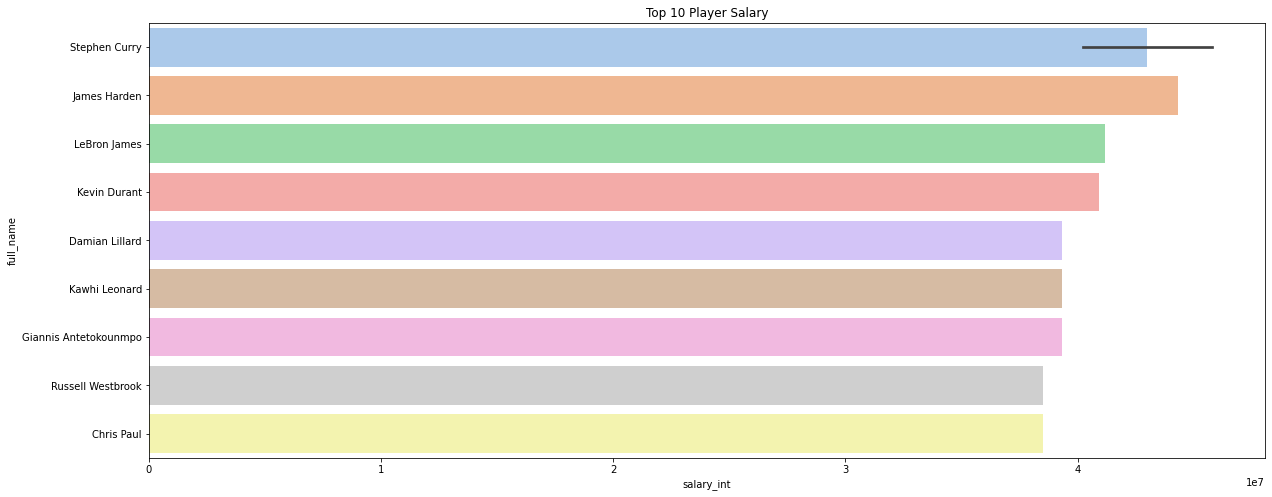

In [13]:
plt.figure(figsize=(20,8))
plt.title('Top 10 Player Salary')
sns.barplot(x='salary_int', y='full_name', data=df.sort_values('salary_int',ascending = False)[:10], palette='pastel')

<AxesSubplot:xlabel='height_int', ylabel='full_name'>

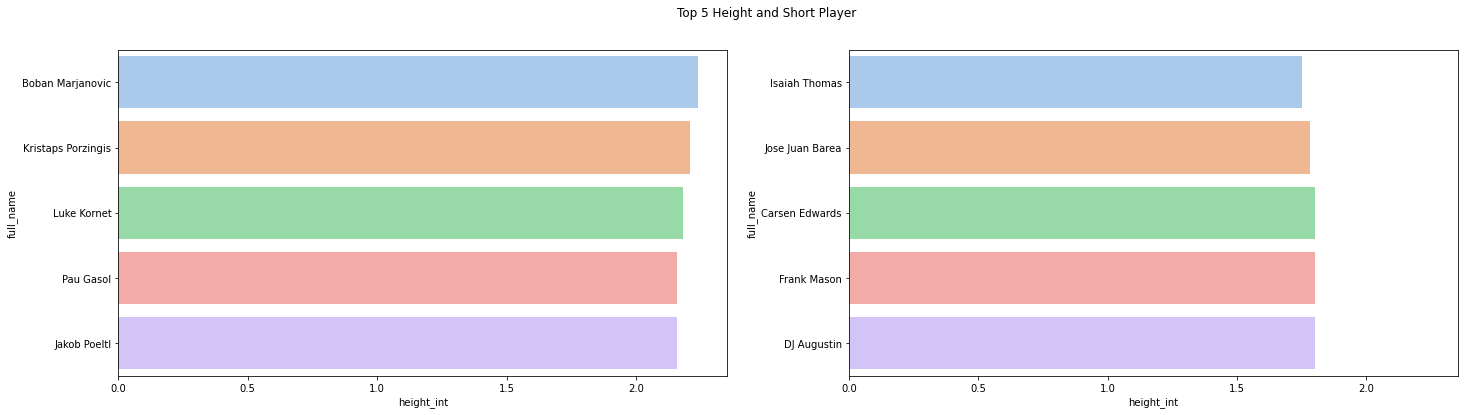

In [14]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(24,6))
figure.suptitle('Top 5 Height and Short Player')
sns.barplot(y='full_name', x="height_int", data=df.sort_values('height_int',ascending = False)[:5], palette='pastel', ax=axes[0])
sns.barplot(y="full_name", x="height_int", data=df.sort_values('height_int')[:5], palette='pastel', ax=axes[1])

<AxesSubplot:xlabel='weight_int', ylabel='full_name'>

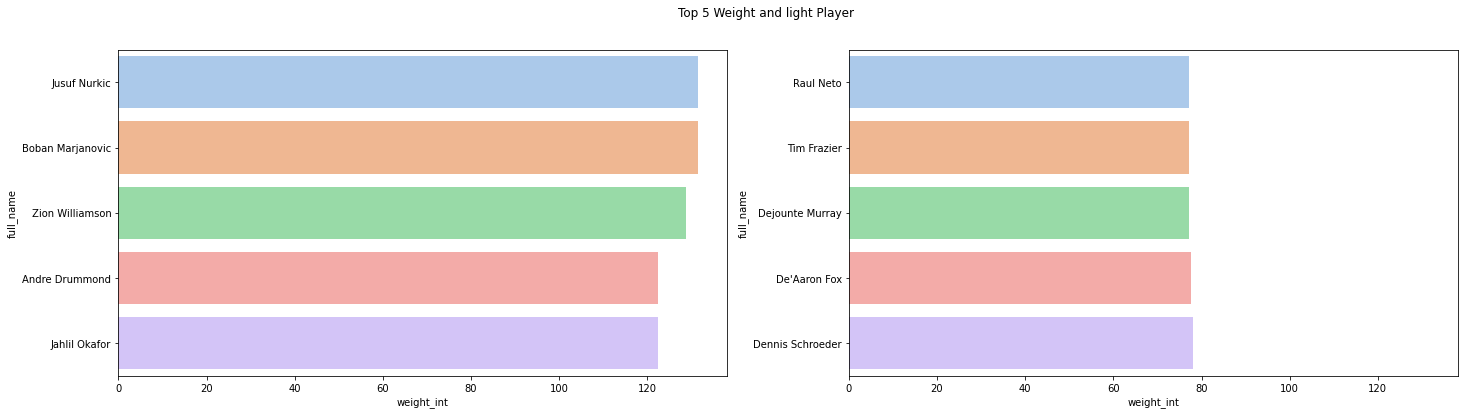

In [15]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(24,6))
figure.suptitle('Top 5 Weight and light Player')
sns.barplot(y='full_name', x="weight_int", data=df.sort_values('weight_int',ascending = False)[:5], palette='pastel', ax=axes[0])
sns.barplot(y="full_name", x="weight_int", data=df.sort_values('weight_int')[:5], palette='pastel', ax=axes[1])

<AxesSubplot:xlabel='position', ylabel='rating'>

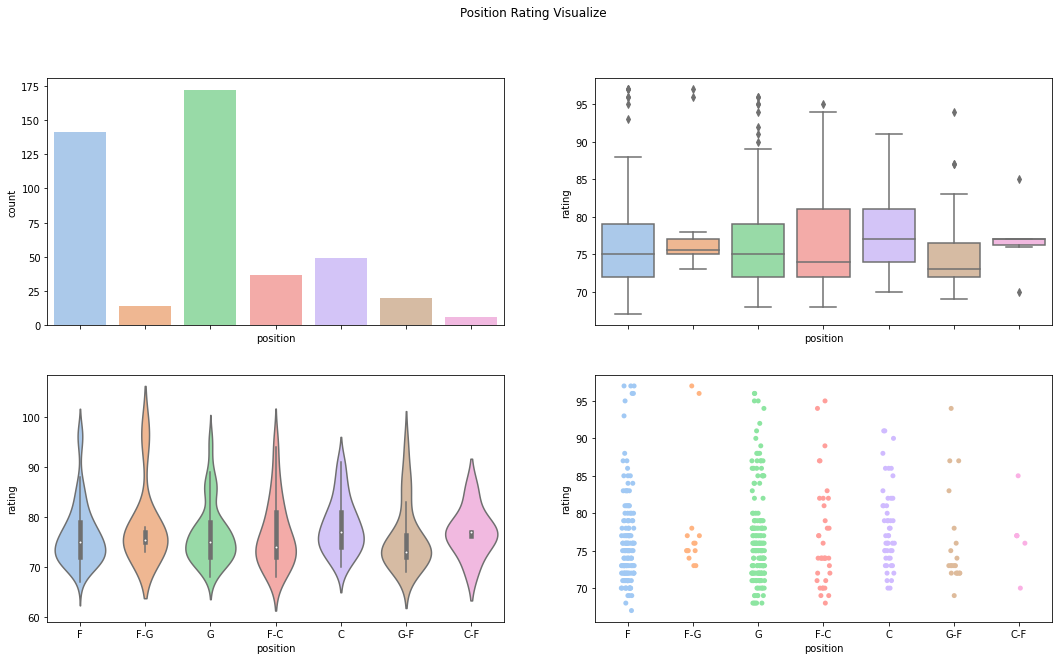

In [16]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
figure.suptitle('Position Rating Visualize')
sns.countplot(x='position',data=df,palette='pastel', ax=axes[0][0])
sns.boxplot(x="position", y="rating", data=df, palette='pastel', ax=axes[0][1])
sns.violinplot(x="position", y="rating", data=df, palette='pastel', ax=axes[1][0])
sns.stripplot(x="position", y="rating", data=df,jitter=True, palette='pastel', ax=axes[1][1])

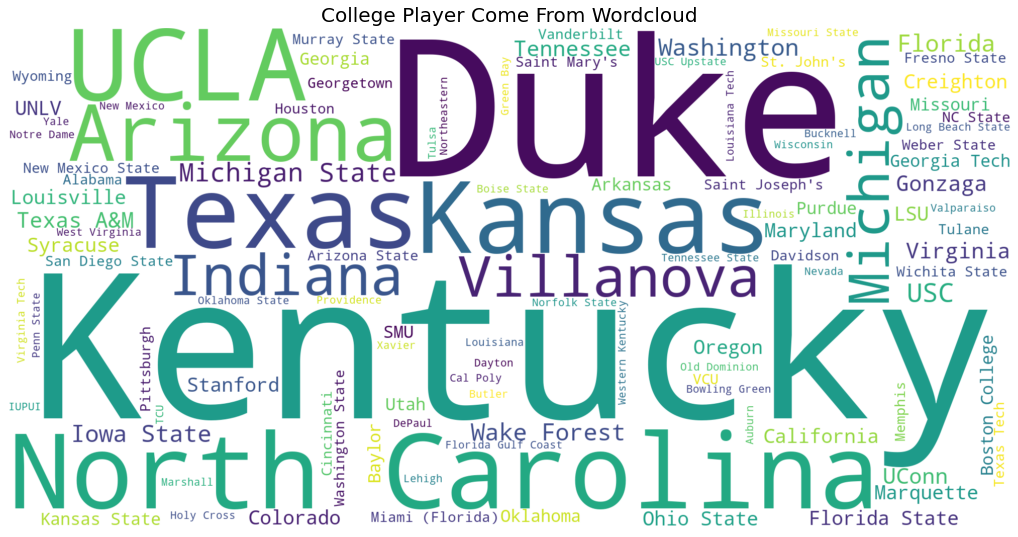

In [17]:
college_player = df['college'].value_counts()
wordcloud = WordCloud(
                    width=2000,
                    height=1000, 
                    scale=1,
                    normalize_plurals=False,
                    repeat=False,
                    random_state=42,
                    background_color='white')

wordcloud.generate_from_frequencies(frequencies = college_player)
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('College Player Come From Wordcloud', fontsize = 20)
plt.show()

<AxesSubplot:title={'center':'Player Draft Year Counts'}, xlabel='count', ylabel='draft_year'>

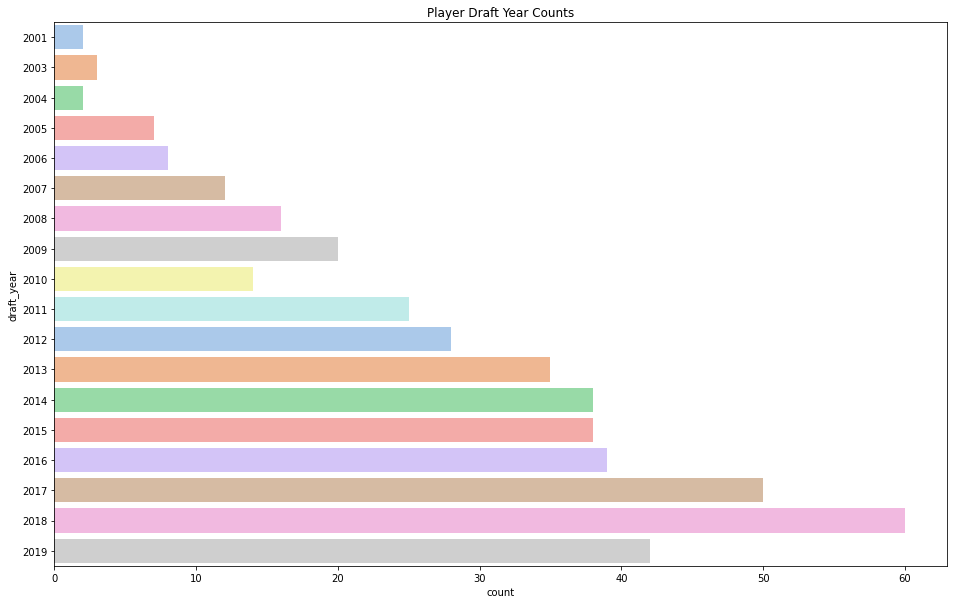

In [18]:
plt.figure(figsize=(16,10))
plt.title('Player Draft Year Counts')
sns.countplot(y='draft_year', data=df, palette='pastel')

<AxesSubplot:xlabel='draft_round', ylabel='rating'>

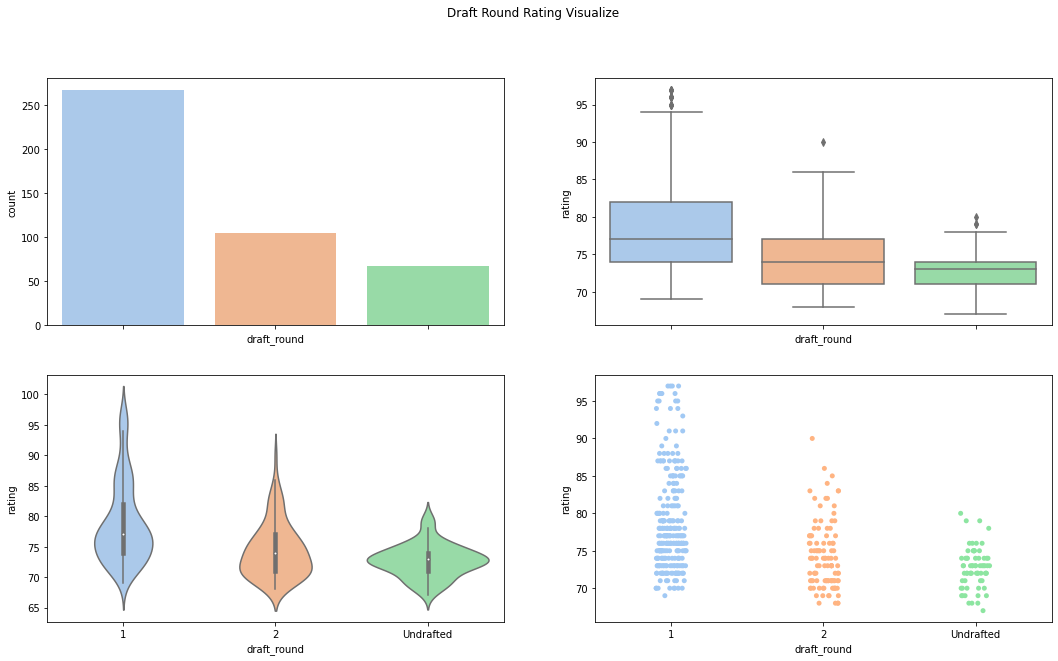

In [19]:
figure, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
figure.suptitle('Draft Round Rating Visualize')
sns.countplot(x='draft_round',data=df,palette='pastel', ax=axes[0][0])
sns.boxplot(x="draft_round", y="rating", data=df, palette='pastel', ax=axes[0][1])
sns.violinplot(x="draft_round", y="rating", data=df, palette='pastel', ax=axes[1][0])
sns.stripplot(x="draft_round", y="rating", data=df,jitter=True, palette='pastel', ax=axes[1][1])

<AxesSubplot:title={'center':'Player Team Rating Mean of Each Teams'}, xlabel='rating', ylabel='team'>

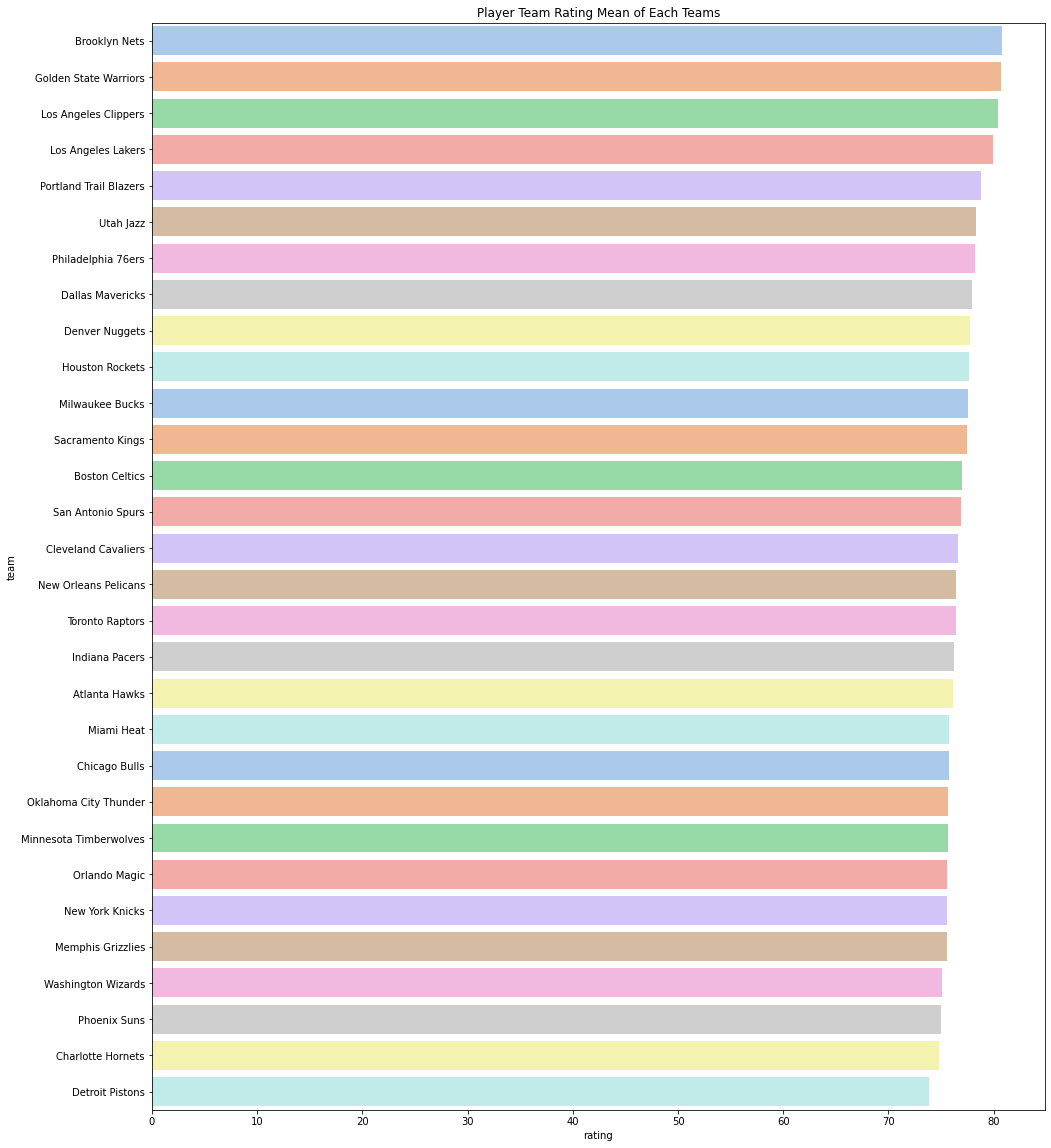

In [20]:
team_group = df.groupby(['team']).mean()
team_group.reset_index(inplace=True)
team_group = team_group.sort_values(by=['rating'], ascending=False)
plt.figure(figsize=(16,20))
plt.title('Player Team Rating Mean of Each Teams')
sns.barplot(x='rating', y='team', data=team_group, palette='pastel')

<AxesSubplot:title={'center':'Player Team Salary Sum of Each Teams'}, xlabel='salary_int', ylabel='team'>

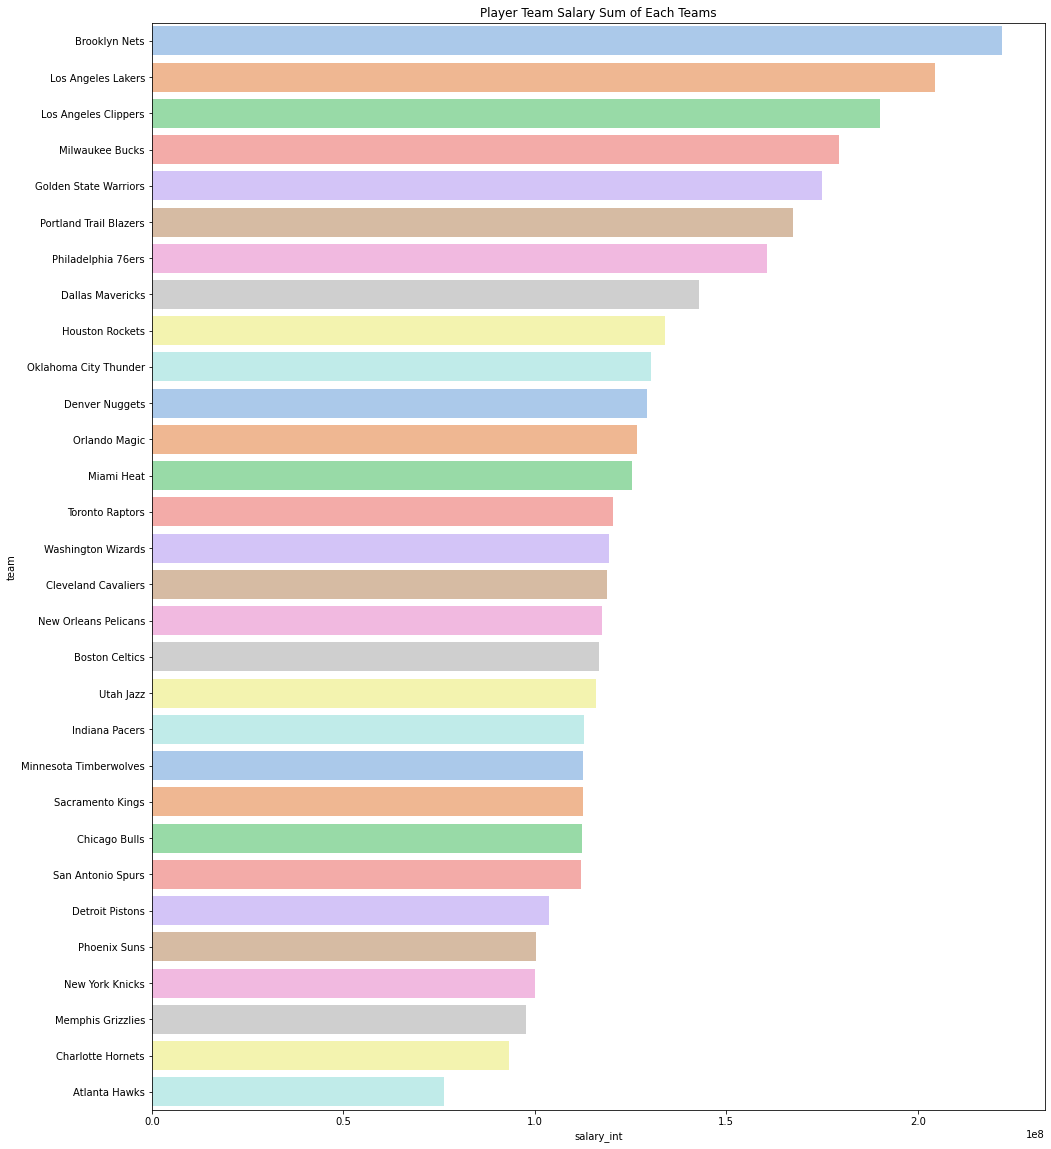

In [21]:
team_group_salary = df.groupby(['team']).sum()
team_group_salary.reset_index(inplace=True)
team_group_salary = team_group_salary.sort_values(by=['salary_int'], ascending=False)
plt.figure(figsize=(16,20))
plt.title('Player Team Salary Sum of Each Teams')
sns.barplot(x='salary_int', y='team', data=team_group_salary, palette='pastel')

In [22]:
features = df[['rating','salary_int']]
features.head()

,rating,salary_int
0,97,37436858
1,97,32742000
2,96,25842697
3,96,37199000
4,96,38199000


Text(0, 0.5, 'Inertia')

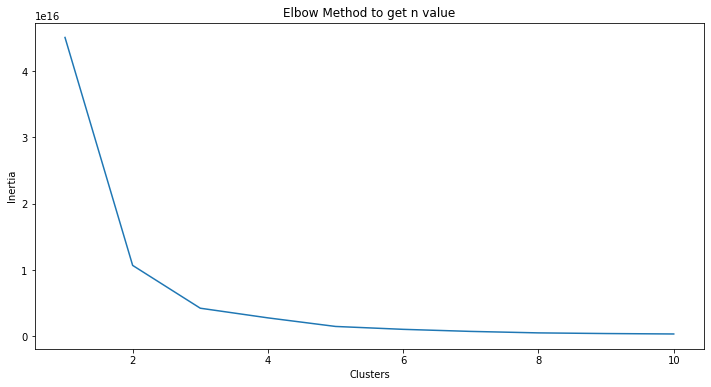

In [23]:
clusters = []
for i in range(1,11):
  kmc = KMeans(n_clusters=i).fit(features)
  clusters.append(kmc.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Method to get n value')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Text(0.5, 1.0, 'Player Clustering with 3 Cluster')

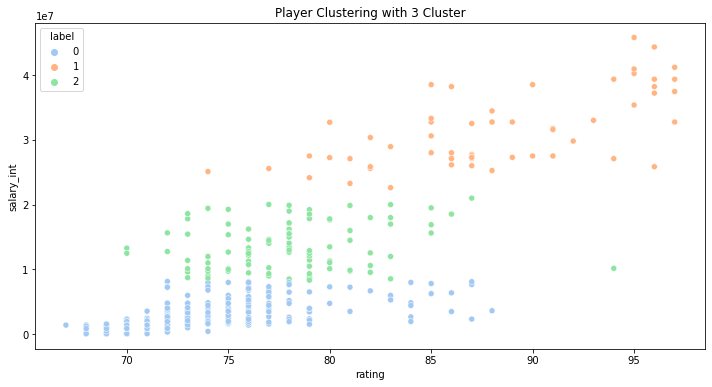

In [24]:
model_cluster = KMeans(n_clusters=3).fit(features)

label_value = model_cluster.labels_
    
features.insert(2, "label", label_value)

plt.figure(figsize=(12,6))
sns.scatterplot(x='rating', y='salary_int',data=features, hue='label',
                palette='pastel')
plt.title('Player Clustering with 3 Cluster')